In [802]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, plot_roc_curve
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SequentialFeatureSelector

### 1. Импортировать набор данных. Обработать выбросы и пропуски.

In [727]:
df = pd.read_csv('adult.csv')  

In [728]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [729]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Вывод: пропуски отсутствуют

Теперь посмотрим выбросы

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


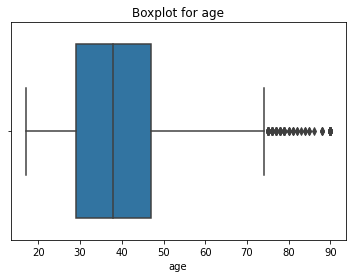

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


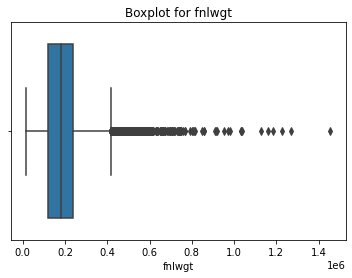

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


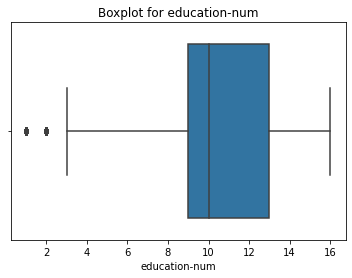

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


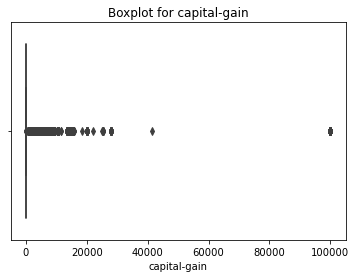

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


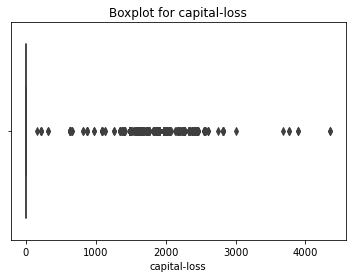

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


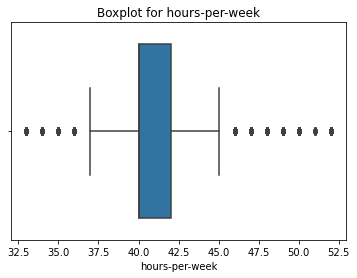

In [730]:
for col in ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']:
    sns.boxplot(data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [731]:
df_1 = df.query('`capital-gain` <= 50000 and `capital-loss` <= 3500 and fnlwgt <= 1300000').reset_index(drop=True)

In [732]:
df_1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32385,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32386,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32387,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32388,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [733]:
df_1.duplicated().sum()

24

In [734]:
df_1 = df_1.drop_duplicates()

In [735]:
df_1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32385,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32386,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32387,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32388,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### 2.	Проверить гипотезу о влиянии признака marital-status на целевую переменную.

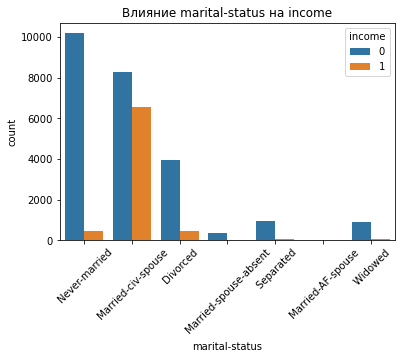

In [801]:
sns.countplot(data=df_1, x='marital-status', hue='income')
plt.title("Влияние marital-status на income")
plt.xticks(rotation=45)
plt.show()

In [737]:
table = pd.crosstab(df['marital-status'], df['income'])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Хи-квадрат:", chi2)
print("p-значение:", p)
print("Степени свободы:", dof)

alpha = 0.05
if p < alpha:
    print("Отвергаем нулевую гипотезу. Есть статистически значимая связь между 'marital-status' и 'salary'.")
else:
    print("Не удалось отвергнуть нулевую гипотезу. Статистически значимой связи между 'marital-status' и 'salary' не найдено.")

Хи-квадрат: 6517.741653663022
p-значение: 0.0
Степени свободы: 6
Отвергаем нулевую гипотезу. Есть статистически значимая связь между 'marital-status' и 'salary'.


### 3.	Выполнить укрупнение признака marital-status и проверить влияние нового признака на результат.

In [738]:
print(df_1['marital-status'].unique())

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


In [739]:
# cоздаем словарь для замены значений
marital_status_mapping = {
    ' Married-civ-spouse': 'Married',
    ' Married-spouse-absent': 'Not-Married',
    ' Married-AF-spouse': 'Married',
    ' Divorced': 'Not-Married',
    ' Separated': 'Not-Married',
    ' Widowed': 'Not-Married',
    ' Never-married': 'Not-Married'
}

df_1.loc[:, 'marital-status-grouped'] = df_1['marital-status'].map(marital_status_mapping).fillna('Unknown')

print(df_1[['marital-status', 'marital-status-grouped']].head())


        marital-status marital-status-grouped
0        Never-married            Not-Married
1   Married-civ-spouse                Married
2             Divorced            Not-Married
3   Married-civ-spouse                Married
4   Married-civ-spouse                Married


C:\Users\София\AppData\Local\Temp\ipykernel_2900\3459668186.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.loc[:, 'marital-status-grouped'] = df_1['marital-status'].map(marital_status_mapping).fillna('Unknown')


### 4.	Построить график зависимости между результирующим признаком и признаком fnlwgt.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


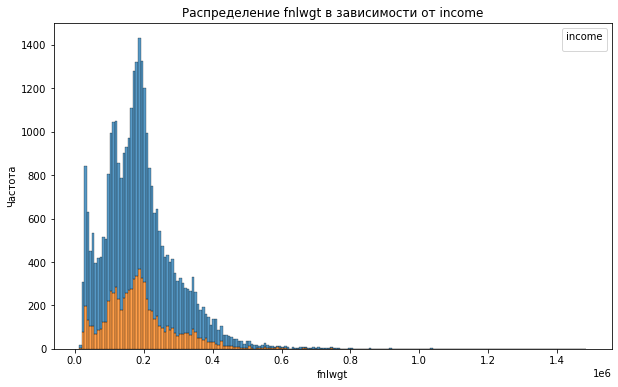

In [767]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='fnlwgt', hue='income', multiple='stack', kde=False)
plt.title("Распределение fnlwgt в зависимости от income")
plt.xlabel("fnlwgt")
plt.ylabel("Частота")
plt.legend(title="income")
plt.show()

### 5.	Провести обработку признаков в зависимости от их типа и подготовить данные для построения классификатора.

In [741]:
numerical = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']

In [742]:
df_1['income'] = df_1['income'].map({' <=50K': 0, ' >50K': 1})

C:\Users\София\AppData\Local\Temp\ipykernel_2900\274661261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['income'] = df_1['income'].map({' <=50K': 0, ' >50K': 1})


In [743]:
df_1


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,marital-status-grouped
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,Not-Married
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,Married
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,Not-Married
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,Married
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,Married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32385,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,Married
32386,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,Married
32387,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,Not-Married
32388,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,Not-Married


### 6.	Разделить выборку на тестовую и обучающую.

In [744]:
X = df_1.drop(['income','native-country'], axis=1)  
y = df_1['income']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

### 7.	Провести отбор признаков в модель любым известным вам методом. 

In [745]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SequentialFeatureSelector

In [746]:
# преобразование количественных признаков: StandardScaler
numerical_transformer = StandardScaler()

In [747]:
# преобразование категориальных признаков: OneHotEncoder
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [748]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical), 
        ('cat', categorical_transformer, categorical)  
    ])

### 8.	Построить классификатор с использованием метода опорных векторов. 

In [749]:
svc = LinearSVC(random_state=10, dual = False) #метод опорных векторов

In [750]:
sfs = SequentialFeatureSelector(estimator=svc,
                                direction='forward', 
                                scoring='roc_auc')

In [751]:
sfs_model_cv = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature selection',sfs),
    ('classifier', svc)], 
                verbose =True)

In [752]:
sfs_model_cv.fit(X_train, y_train)

[Pipeline] ...... (step 1 of 3) Processing preprocessor, total=   0.0s
[Pipeline] . (step 2 of 3) Processing feature selection, total= 2.7min
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'fnlwgt',
                                                   'education-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex'])])),
                ('feature selection',
                 SequentialFeatureSelector(estimator=LinearSVC(dual=

In [753]:
print('Number of selected features : %d' % sfs_model_cv.named_steps['feature selection'].n_features_to_select_)

Number of selected features : 33


### 9.	Валидировать модель. Подобрать гиперпараметры модели, максимизирующие метрику roc_auc.

In [754]:
# определяем параметры для подбора гиперпараметров
parameters = [
    {'classifier__penalty': ['l1', 'l2'], 'classifier__loss': ['hinge', 'squared_hinge'], 'classifier__C': [0.5, 1, 5] }]

In [755]:
# настроим кросс-валидацию с использованием StratifiedKFold (чтобы сохранить пропорции классов)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [756]:
# инициализируем GridSearchCV с кросс-валидацией и настройкой verbose
clf = GridSearchCV(sfs_model_cv, parameters, cv=kf, verbose=3, scoring='roc_auc')

In [757]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[Pipeline] ...... (step 1 of 3) Processing preprocessor, total=   0.0s
[Pipeline] . (step 2 of 3) Processing feature selection, total= 2.3min
[CV 1/5] END classifier__C=0.5, classifier__loss=hinge, classifier__penalty=l1;, score=nan total time= 2.3min
[Pipeline] ...... (step 1 of 3) Processing preprocessor, total=   0.0s
[Pipeline] . (step 2 of 3) Processing feature selection, total= 2.3min
[CV 2/5] END classifier__C=0.5, classifier__loss=hinge, classifier__penalty=l1;, score=nan total time= 2.3min
[Pipeline] ...... (step 1 of 3) Processing preprocessor, total=   0.0s
[Pipeline] . (step 2 of 3) Processing feature selection, total= 2.4min
[CV 3/5] END classifier__C=0.5, classifier__loss=hinge, classifier__penalty=l1;, score=nan total time= 2.4min
[Pipeline] ...... (step 1 of 3) Processing preprocessor, total=   0.0s
[Pipeline] . (step 2 of 3) Processing feature selection, total=11.3min
[CV 4/5] END classifier__C=0.5, classifie

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.3s
[CV 3/5] END classifier__C=0.5, classifier__loss=squared_hinge, classifier__penalty=l1;, score=0.900 total time= 1.3min
[Pipeline] ...... (step 1 of 3) Processing preprocessor, total=   0.0s
[Pipeline] . (step 2 of 3) Processing feature selection, total= 1.4min
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END classifier__C=0.5, classifier__loss=squared_hinge, classifier__penalty=l1;, score=0.897 total time= 1.4min
[Pipeline] ...... (step 1 of 3) Processing preprocessor, total=   0.0s
[Pipeline] . (step 2 of 3) Processing feature selection, total= 1.4min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.3s
[CV 5/5] END classifier__C=0.5, classifier__loss=squared_hinge, classifier__penalty=l1;, score=0.906 total time= 1.4min
[Pipeline] ...... (step 1 of 3) Processing preprocessor, total=   0.0s
[Pipeline] . (step 2 of 3) Processing feature selection, total= 1.4min
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[CV 1/5] END classifier__C=0.5, classifier__loss=squared_hinge, classifier__penalty=l2;, score=0.901 total time= 1.4min
[Pipeline] ...... (step 1 of 3) Processing preprocessor, total=   0.0s
[Pipeline] . (step 2 of 3) Processing feature selection, total= 1.4min
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[CV 2/5] END classifier__C=0.5, classifier__loss=squared_hinge, classifier__penalty=l2;, score=0.918 total time= 1.4min
[Pipeline] ...... (step 1 of 3) Processing preprocessor, total=   0.0s
[Pipeline] . (step 2 of 3) Processing feature selection, total= 1.4min
[

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.3s
[CV 3/5] END classifier__C=1, classifier__loss=squared_hinge, classifier__penalty=l1;, score=0.900 total time= 1.3min
[Pipeline] ...... (step 1 of 3) Processing preprocessor, total=   0.0s
[Pipeline] . (step 2 of 3) Processing feature selection, total= 1.4min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.2s
[CV 4/5] END classifier__C=1, classifier__loss=squared_hinge, classifier__penalty=l1;, score=0.897 total time= 1.4min
[Pipeline] ...... (step 1 of 3) Processing preprocessor, total=   0.0s
[Pipeline] . (step 2 of 3) Processing feature selection, total= 1.3min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.2s
[CV 5/5] END classifier__C=1, classifier__loss=squared_hinge, classifier__penalty=l1;, score=0.905 total time= 1.4min
[Pipeline] ...... (step 1 of 3) Processing preprocessor, total=   0.0s
[Pipeline] . (step 2 of 3) Processing feature selection, total= 1.3min
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[CV 1/5] END classifier__C=1, classifier__loss=squared_hinge, classifier__penalty=l2;, score=0.901 total time= 1.3min
[Pipeline] ...... (step 1 of 3) Processing preprocessor, total=   0.0s
[Pipeline] . (step 2 of 3) Processing feature selection, total= 1.3min
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[CV 2/5] END classifier__C=1, classifier__loss=squared_hinge, classifier__penalty=l2;, score=0.918 total time= 1.3min
[Pipeline] ...... (step 1 of 3) Processing preprocessor, total=   0.0s
[Pipeline] . (step 2 of 3) Processing feature selection, total= 1.3min
[Pipeli

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 257, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
 

[Pipeline] . (step 2 of 3) Processing feature selection, total= 1.6min
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'fnlwgt',
                                                                          'education-num',
                                                                          'capital-gain',
                                                                          'capital-loss',
                                                                          'hours-per-week']),
                                                                        ('cat',
                                                                         OneHotEncoder(

Примечание: модель очень долго обучалась

In [769]:
y_pred = clf.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [ ]:
# получим предсказанные вероятности для оценки ROC AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]

### 10.	Оценить качество полученной модели.

In [781]:
clf.best_params_

{'classifier__C': 0.5,
 'classifier__loss': 'squared_hinge',
 'classifier__penalty': 'l1'}

In [782]:
clf.best_score_

0.9043943629609517

In [784]:
pred_test = clf.best_estimator_.predict(X_test)

In [785]:
print(classification_report(y_test, pred_test, labels = clf.classes_))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     19754
           1       0.72      0.58      0.64      6139

    accuracy                           0.85     25893
   macro avg       0.80      0.76      0.77     25893
weighted avg       0.84      0.85      0.84     25893



In [788]:
from sklearn.metrics import confusion_matrix
# сделаем матрицу ошибок
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[18378  1376]
 [ 2570  3569]]


### 11.	Оценить важность признаков. 

In [790]:
bm = clf.best_estimator_

In [791]:
weights = bm.named_steps['classifier'].coef_.round(2)[0]

In [792]:
features = bm.named_steps['preprocessor'].get_feature_names_out()

In [795]:
feature_importance = pd.Series({k: v for k, v in zip(features , weights)})

In [797]:
feature_importance

num__age                                  0.13
num__fnlwgt                               0.04
num__education-num                        0.23
num__capital-gain                         0.33
num__capital-loss                         0.10
num__hours-per-week                       0.14
cat__workclass_ ?                         0.00
cat__workclass_ Federal-gov               0.17
cat__workclass_ Local-gov                -0.18
cat__workclass_ Never-worked             -0.17
cat__workclass_ Private                   0.24
cat__workclass_ Self-emp-inc             -0.16
cat__workclass_ Self-emp-not-inc         -0.16
cat__workclass_ State-gov                 0.27
cat__workclass_ Without-pay               0.24
cat__education_ 10th                      0.00
cat__education_ 11th                      0.61
cat__education_ 12th                      0.00
cat__education_ 1st-4th                  -0.07
cat__education_ 5th-6th                  -0.32
cat__education_ 7th-8th                  -0.07
cat__educatio